# Building Unimodal Text Model

In [1]:
cd ..

e:\notebooks\MultimodalTweetsClassification


In [2]:
#ensuring that any edits to libraries you make are reloaded here automatically
#to ensuere charts or images displayed are shown in this notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [3]:
#importing required modules
from exp.Required_Modules_And_Packages import *
from exp.Data_Reading_And_Preprocessing import *
from exp.Required_Integration_Functionalities_For_Transformer_To_Fastai import *
from exp.Required_Functionalities_To_Handal_Multimodal_Dataset import *
from exp.Multimodal_Model_With_Intermediate_Or_EmbraceNet_Fusion import *

In [4]:
path = Path('/notebooks/MultimodalTweetsClassification')
# path.ls()

In [5]:
path_img = path/'data_image'

In [6]:
# Uncomment the code if dataset and labels are in .tar.gz and .zip format respectively

# data = "CrisisMMD_v2.tar.gz"
# agreed_label = "crisismmd_datasplit_agreed_label.zip"
# untar_data_and_unzip_label(data,agreed_label)

In [7]:
#reading csv files and doing initial necessary processing
data_info_text,test_data_info_text = get_dataframe(*get_tsv_data_files('Informativeness_task_tsv_files'),path)

reading data and preprocessing it.....
done!!


In [8]:
print(f"shape of data: {data_info_text.shape}\n")
print(f"train set: {data_info_text['is_valid'].value_counts()[0]}")
print(f"valid set: {data_info_text['is_valid'].value_counts()[1]}")      
print("="*50)
print(f"shape of test data: {test_data_info_text.shape}\n")

shape of data: (15844, 10)

train set: 13607
valid set: 2237
shape of test data: (2237, 9)



In [9]:
data_info_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid
0,california_wildfires,917791291823591425,917791291823591425_1,pls share were capturing wildfire response rec...,data_image/california_wildfires/10_10_2017/917...,not_informative,informative,not_informative,Negative,False
1,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False
2,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False
3,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False
4,california_wildfires,917815040962695168,917815040962695168_0,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False


In [10]:
test_data_info_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image
0,srilanka_floods,878185882431389696,878185882431389696_0,cristofer clemente mora now in nd at aguille d...,data_image/srilanka_floods/23_6_2017/878185882...,not_informative,not_informative,not_informative,Positive
1,hurricane_harvey,906258753707790336,906258753707790336_0,on our way to warrior restoration to help orga...,data_image/hurricane_harvey/8_9_2017/906258753...,not_informative,informative,not_informative,Negative
2,hurricane_maria,910542719864397824,910542719864397824_0,hurricane maria batters puerto rico as cat mon...,data_image/hurricane_maria/20_9_2017/910542719...,informative,informative,informative,Positive
3,hurricane_harvey,906219963152785408,906219963152785408_0,zz top donating la grange download sales to ...,data_image/hurricane_harvey/8_9_2017/906219963...,informative,informative,not_informative,Negative
4,hurricane_maria,913009824195104768,913009824195104768_0,am maria update holding steady as strong tropi...,data_image/hurricane_maria/27_9_2017/913009824...,informative,informative,informative,Positive


In [11]:
data_info_text['tweet_text'][0]

'pls share were capturing wildfire response recovery info here'

In [12]:
# preparing data for language model to get encoder and word embedding vocab for text classification model
data_lm = get_text_data_for_language_model(data_info_text,path)

In [13]:
data_lm

TextLMDataBunch;

Train: LabelList (13607 items)
x: LMTextList
xxbos pls share were xxunk wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via
y: LMLabelList
,,,,
Path: \notebooks\MultimodalTweetsClassification;

Valid: LabelList (2237 items)
x: LMTextList
xxbos iran earthquake damage put at over bn pounds international,xxbos we ve lost track of how many xxunk teams have helped so proud of our church harvey,xxbos the gym above xxunk got destroyed the xxunk wall got blown out hurricanemaria,xxbos famous xxunk xxunk xxunk for xxunk in florida keys during irma,xxbos californias xxunk fire in xxunk captured in pictures and videos xxunk
y: LMLabelList
,,,,
Path: \notebooks\MultimodalTweetsClassification;

Test: None

In [14]:
# showing the data with corresponding annotations
data_lm.show_batch()

idx,text
0,in the fall xxbos why california wildfires are worse in the fall xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my
1,across teknaf xxbos mora staff sending off their xxunk thank you for all of your service to our students moraschools xxbos mora staff sending off their xxunk thank you for all of your service to our students moraschools xxbos cleaning wells in flood affected areas of praduwa southern province srilanka xxbos cleaning wells in flood affected areas of praduwa southern province srilanka xxbos cleaning wells in flood affected areas of
2,simar ka his character and mora a a a a xxbos mabel mora says see you soon to seven years full of nice moments thank you very much mabel xxbos mabel mora says see you soon to seven years full of nice moments thank you very much mabel xxbos mabel mora says see you soon to seven years full of nice moments thank you very much mabel xxbos mora lakin
3,mexico about earthquake more explantion on my blog painting artoftheday mexique xxbos mexico about earthquake more explantion on my blog painting artoftheday mexique xxbos mexico about earthquake more explantion on my blog painting artoftheday mexique xxbos mexico about earthquake more explantion on my blog painting artoftheday mexique xxbos please help support and share lasvegasshooting mexicoearthquake puertoricoselevanta xxbos please help support and share lasvegasshooting mexicoearthquake puertoricoselevanta xxbos please help support and
4,posted in the wrong chat dead harvey xxunk xxunk xxbos currently stuck on monroe my truck hurricaneharvey xxbos currently stuck on monroe my truck hurricaneharvey xxbos hurricaneharvey almost up to my door xxbos hurricaneharvey almost up to my door xxbos hurricaneharvey almost up to my door xxbos hurricaneharvey almost up to my door xxbos really thought ciara story was gon be something about hurricane harvey but it was really just


In [ ]:
# Creates a fastai DataBunch for language modeling (unsupervised), using all available text.


# importing pretrained AWD_LSTM model and making learner object consist of data,model for training
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

<b>learn_lm.lr_find() </b>
is used to automatically find a good learning rate for your model in Fastai.

Runs a short training run where the learning rate increases exponentially.
Records the loss at each step. Helps you visually identify the learning rate range where the model starts learning effectively without diverging.

In [16]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


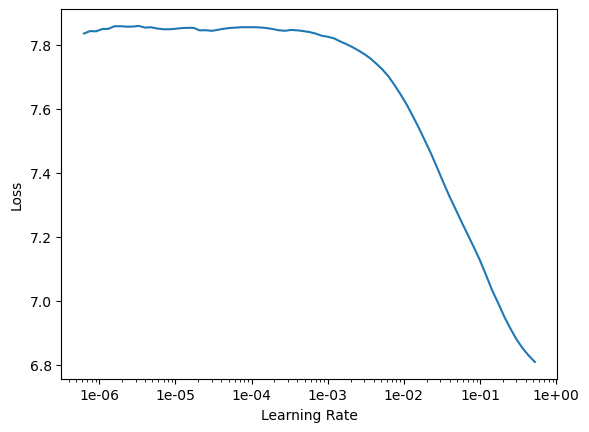

In [17]:
learn_lm.recorder.plot(skip_end=15)

Especially useful for fine-tuning a pretrained language model on your own dataset.


In [18]:
# training the top layer's while keeping bottom layer's in freeze state
learn_lm.fit_one_cycle(2,5e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.690371,4.977901,0.222640,04:36
1,4.735522,4.865738,0.231952,04:22


Unfreezes all layers of the language model for further fine-tuning.



In [19]:
learn_lm.unfreeze()

All layers are trainable because you previously called learn_lm.unfreeze().



In [20]:
learn_lm.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.795512,4.844254,0.235778,05:22


In [21]:
# saving encoder for using it in classification model
learn_lm.save_encoder('fine_tuned_enc_info')

In [22]:
# preprocessing and creating text databunch object for data(train and dev split) and test data(test split)
data_clas = get_text_data(data_info_text,path,vocab=data_lm.vocab)
test_data_clas = get_test_text_data(test_data_info_text,path,vocab=data_lm.vocab)

In [23]:
# making single databunch object of data and test data
data_clas.add_test(test_data_clas.train_ds)
data_clas.test_ds.y = test_data_clas.train_ds.y

In [24]:
data_clas

TextClasDataBunch;

Train: LabelList (13607 items)
x: TextList
xxbos pls share were xxunk wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via
y: CategoryList
informative,informative,informative,informative,informative
Path: \notebooks\MultimodalTweetsClassification;

Valid: LabelList (2237 items)
x: TextList
xxbos iran earthquake damage put at over bn pounds international,xxbos we ve lost track of how many xxunk teams have helped so proud of our church harvey,xxbos the gym above xxunk got destroyed the xxunk wall got blown out hurricanemaria,xxbos famous xxunk xxunk xxunk for xxunk in florida keys during irma,xxbos californias xxunk fire in xxunk captured in pictures and videos xxunk
y: CategoryList
informative,informative,informative,informative,informativ

In [25]:
# showing data with labels
data_clas.show_batch()

text,target
xxbos ya ll be sure to get in on this week xxunk ve got to know what you think you know in case need to know,not_informative
xxbos me seeing that bunch of xxunk fans are going to virginia to see xxunk fisher while i m stuck in fucking puerto rico,not_informative
xxbos we did the mickey not so scary halloween at magic kingdom last night it was fun after irma we needed to do so,not_informative
xxbos new day new week quick look back at lot of hard work by the dedicated team at cbs miami crash course in team,not_informative
xxbos xxunk north carolina at this pier in light of harvey and irma the country is xxunk what jose is doing to t,informative


drop_mult=0.5 → A good regularization setting (adjustable if overfitting).

Using both macro and weighted versions of Precision, Recall, and FBeta gives a thorough evaluation of model performance, especially on imbalanced datasets.

EarlyStoppingCallback and ReduceLROnPlateauCallback together:

Prevent overfitting.

Adapt learning rate when improvement stalls.

ShowGraph → Visual feedback during training.



In [26]:
# importing pretrained AWD-LSTM model and making learner object consist of data,model,metrics and callbacks for training
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5,metrics=[accuracy,Precision(average='macro'),
                Precision(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='valid_loss', min_delta=0.01, patience=3),
               partial(ReduceLROnPlateauCallback,monitor='valid_loss', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)]  
            )

it loads the encoder (the pretrained + fine-tuned part of your AWD-LSTM language model) into your text classification model (learn_clas).

In [27]:
# laoding encoder for classification
learn_clas.load_encoder('fine_tuned_enc_info')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (13607 items)
x: TextList
xxbos pls share were xxunk wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via
y: CategoryList
informative,informative,informative,informative,informative
Path: \notebooks\MultimodalTweetsClassification;

Valid: LabelList (2237 items)
x: TextList
xxbos iran earthquake damage put at over bn pounds international,xxbos we ve lost track of how many xxunk teams have helped so proud of our church harvey,xxbos the gym above xxunk got destroyed the xxunk wall got blown out hurricanemaria,xxbos famous xxunk xxunk xxunk for xxunk in florida keys during irma,xxbos californias xxunk fire in xxunk captured in pictures and videos xxunk
y: CategoryList
informative,informative,informative,inform

In [ ]:
# training model using discriminative fine-tunnig and gradual unfreezing
learn_clas.lr_find()

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


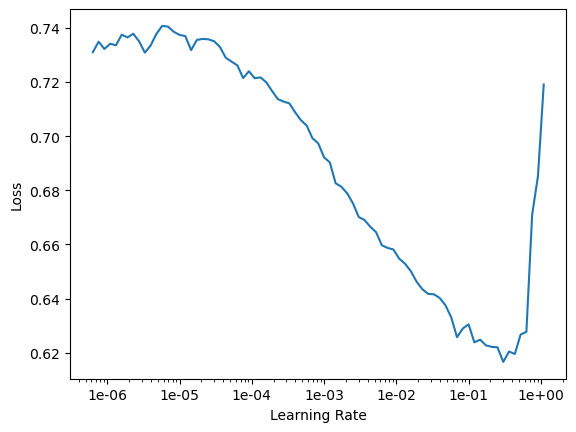

In [29]:
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time
0,0.457349,0.431983,0.801967,0.768182,0.792258,0.705359,0.801967,0.724539,0.788975,06:22
1,0.428878,0.422809,0.805096,0.769951,0.795780,0.714388,0.805096,0.732562,0.794014,06:16


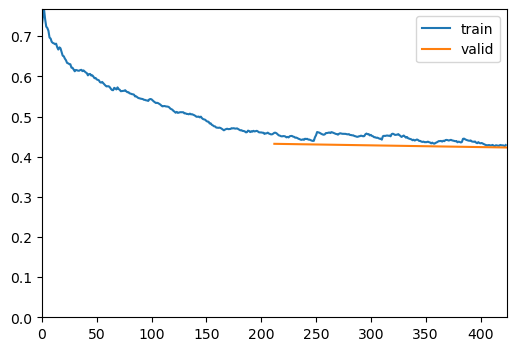

In [30]:
# training the model's top layer's keeping keep other layer's in freezing mode, all the metrics shown here, have been
# evaluted on validation set
learn_clas.fit_one_cycle(2,5e-3,moms=(0.8,0.7),wd=1e-1)

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time
0,0.435179,0.435543,0.811355,0.773750,0.803324,0.732935,0.811354,0.748097,0.803793,06:30
1,0.406951,0.412872,0.809119,0.781285,0.800894,0.712281,0.809119,0.733075,0.795936,06:38
2,0.349149,0.418253,0.816272,0.788675,0.808747,0.726550,0.816272,0.746761,0.805300,06:24


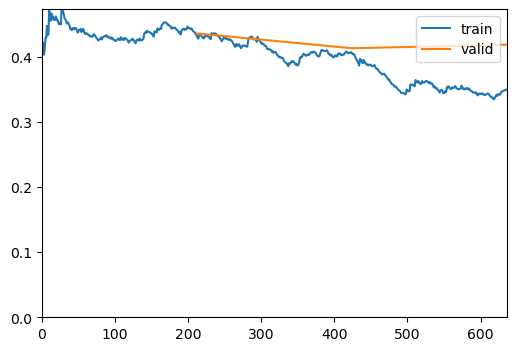

In [31]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7),wd=1e-1)

In [32]:
# learn_clas.freeze_to(-3)
# learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time
0,0.324007,0.416786,0.816272,0.783175,0.808518,0.734877,0.816272,0.752123,0.807760,06:52
1,0.301972,0.435236,0.813590,0.779433,0.805506,0.731057,0.813590,0.748195,0.804813,07:06
2,0.293728,0.453578,0.810907,0.776212,0.802453,0.726257,0.810907,0.743623,0.801572,07:04
3,0.272458,0.464632,0.807778,0.766963,0.799902,0.732413,0.807778,0.745738,0.801153,07:32


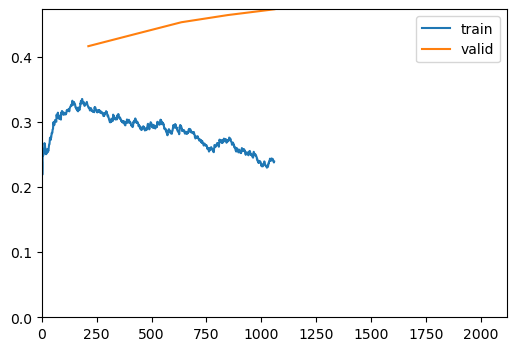

Better model found at epoch 0 with accuracy value: 0.8162717819213867.
Epoch 1: reducing lr to 0.000152
Epoch 2: reducing lr to 0.0002
Epoch 3: reducing lr to 0.00019009692640269474
Epoch 4: early stopping
Epoch 4: reducing lr to 0.00016234913078995263


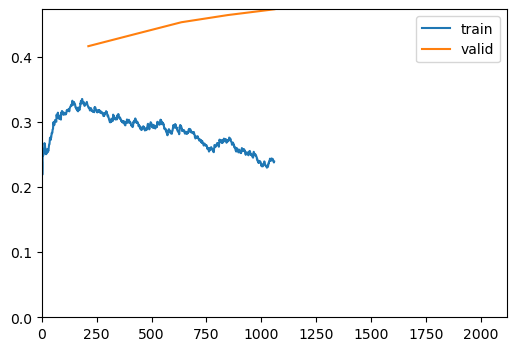

In [33]:
# training all layer's of the model and saving the best one
learn_clas.unfreeze()
learn_clas.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7),
                    callbacks=[SaveModelCallback(learn_clas,every='improvement', monitor='accuracy', name='best')])

In [34]:
# making interpretation on dev split
interp = ClassificationInterpretation.from_learner(learn_clas)

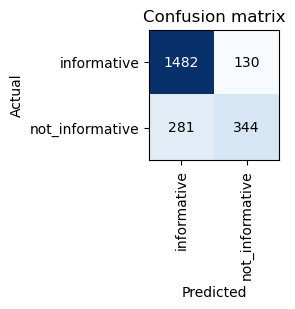

In [35]:
#plotting the confusion matrix
interp.plot_confusion_matrix(figsize=(3,3), dpi=100)

In [36]:
#making predictions on validation set to use it in classification report
preds,y,losses = learn_clas.get_preds(ds_type=DatasetType.Valid,with_loss=True)

y_preds = preds.argmax(1)

In [37]:
target_names = ['informative', 'non-informative']
print(classification_report(y, y_preds, target_names=target_names))

                 precision    recall  f1-score   support

    informative       0.84      0.92      0.88      1612
non-informative       0.73      0.55      0.63       625

       accuracy                           0.82      2237
      macro avg       0.78      0.73      0.75      2237
   weighted avg       0.81      0.82      0.81      2237



In [38]:
learn_clas.validate(data_clas.test_dl,metrics=[accuracy,Precision(average='macro'),Precision(average='weighted'),
                                                     Recall(average='macro'),Recall(average='weighted'),
                                                    FBeta(average='macro',beta=1),FBeta(average='weighted',beta=1)])

[0.3920279,
 tensor(0.8239),
 tensor(0.7872),
 tensor(0.8180),
 tensor(0.7583),
 tensor(0.8239),
 tensor(0.7702),
 tensor(0.8192)]

In [39]:
#making predictions on test set to use it in classification report
preds,y,losses = learn_clas.get_preds(ds_type=DatasetType.Test,with_loss=True)

In [40]:
y_preds = preds.argmax(1)

In [41]:
print(classification_report(y, y_preds, target_names=target_names))

                 precision    recall  f1-score   support

    informative       0.86      0.91      0.88      1612
non-informative       0.72      0.61      0.66       625

       accuracy                           0.82      2237
      macro avg       0.79      0.76      0.77      2237
   weighted avg       0.82      0.82      0.82      2237



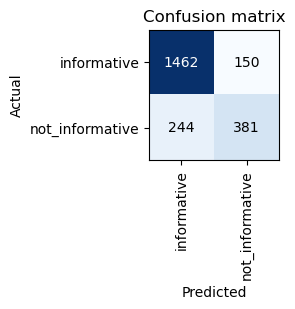

In [42]:
# making interpretation on dev split
interp = ClassificationInterpretation.from_learner(learn_clas,ds_type=DatasetType.Test)
interp.plot_confusion_matrix(figsize=(3,3), dpi=100)

In [43]:
learn_clas.save("Informative_text_only")